In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# H1.1
a)

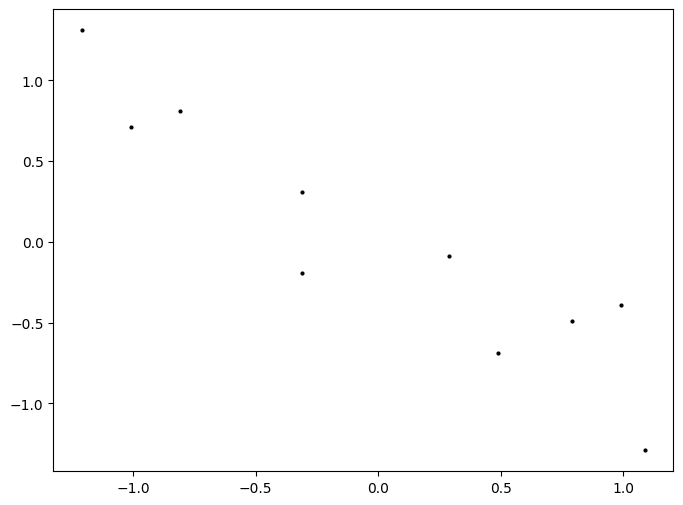

In [52]:
df = pd.read_csv('./resources/pca-data-2d.dat', header=None, sep=r'\s+')
centered = df - df.mean()
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(centered[0], centered[1], 'o', markersize=2, color='black')
plt.show()

Calculate PCs and plot

[ 0.73517866 -0.6778734 ]


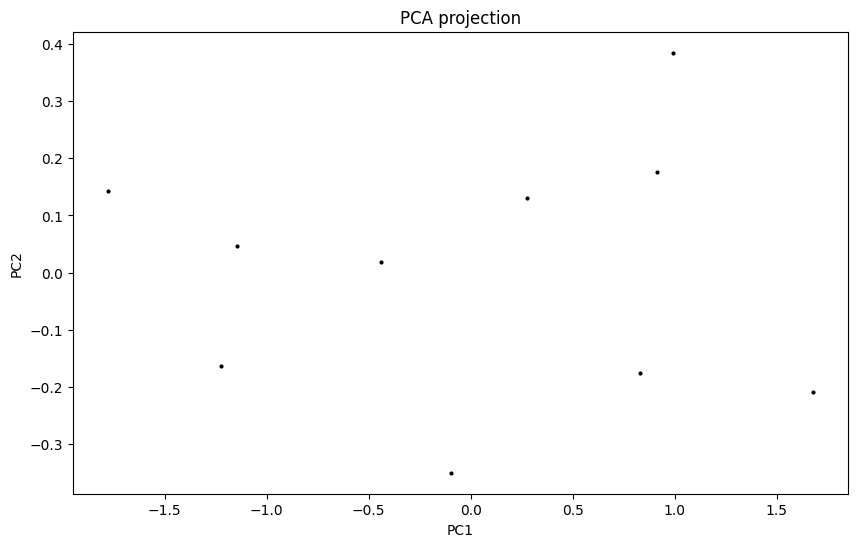

In [47]:
# calculate covariance matrix
cov_matrix = np.cov(df.T)
# get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# sort eigenvalues
idx = eigenvalues.argsort()[::-1]
sorted_eigenvalues = eigenvalues[idx]

# plot data in the pc space
pc1 = centered.dot(eigenvectors[:, idx[0]])
pc2 = centered.dot(eigenvectors[:, idx[1]])
print(eigenvectors[:, idx[0]])
plt.figure(figsize=(10, 6))
plt.plot(pc1, pc2, 'o', markersize=2, color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection')
plt.show()

# Error with PC-Compression

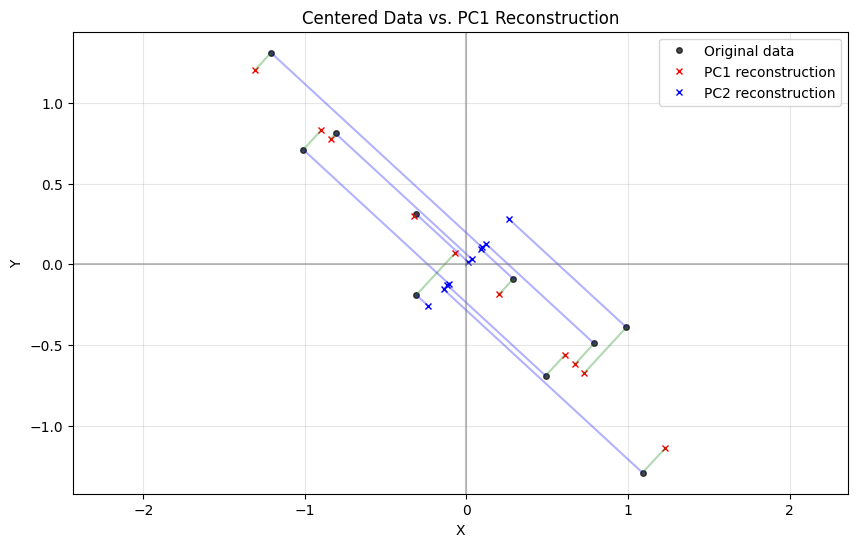

In [70]:
# show error with pc1 compression
pc_df = pd.DataFrame({'pc1': pc1, 'pc2': pc2})
reconstructed_pc1 = np.outer(pc_df['pc1'], eigenvectors[:, idx[0]])
reconstructed_pc2 = np.outer(pc_df['pc2'], eigenvectors[:, idx[1]])

fig, ax = plt.subplots(figsize=(10, 6))

# Plot original centered data
centered_np = centered.values
ax.plot(centered_np[:, 0], centered_np[:, 1], 'o', markersize=4, color='black', alpha=0.7, label='Original data')


# Plot reconstructed data 
ax.plot(reconstructed_pc1[:, 0], reconstructed_pc1[:, 1], 'rx', markersize=5, label='PC1 reconstruction')

ax.plot(reconstructed_pc2[:, 0], reconstructed_pc2[:, 1], 'bx', markersize=5, label='PC2 reconstruction')

# Connect original and reconstructed points with lines to show compression error
for i in range(len(centered)):
    ax.plot([centered_np[i, 0], reconstructed_pc1[i, 0]], 
            [centered_np[i, 1], reconstructed_pc1[i, 1]], 
            'g-', alpha=0.3)
        # Line from original to PC2 reconstruction
    ax.plot([centered_np[i, 0], reconstructed_pc2[i, 0]], 
            [centered_np[i, 1], reconstructed_pc2[i, 1]], 
            'b-', alpha=0.3)

# Add axes at origin
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.5)

ax.grid(True, alpha=0.3)
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Centered Data vs. PC1 Reconstruction')
ax.axis('equal')
plt.show()

# Exercise H1.2 

          x         y         z
0 -0.194263  0.223524 -0.211130
1  0.020346 -0.380149 -0.990472
2  0.832259  3.054901 -2.725782
3  0.776873  1.540465  1.269721
4 -0.025527  0.064696  0.088624


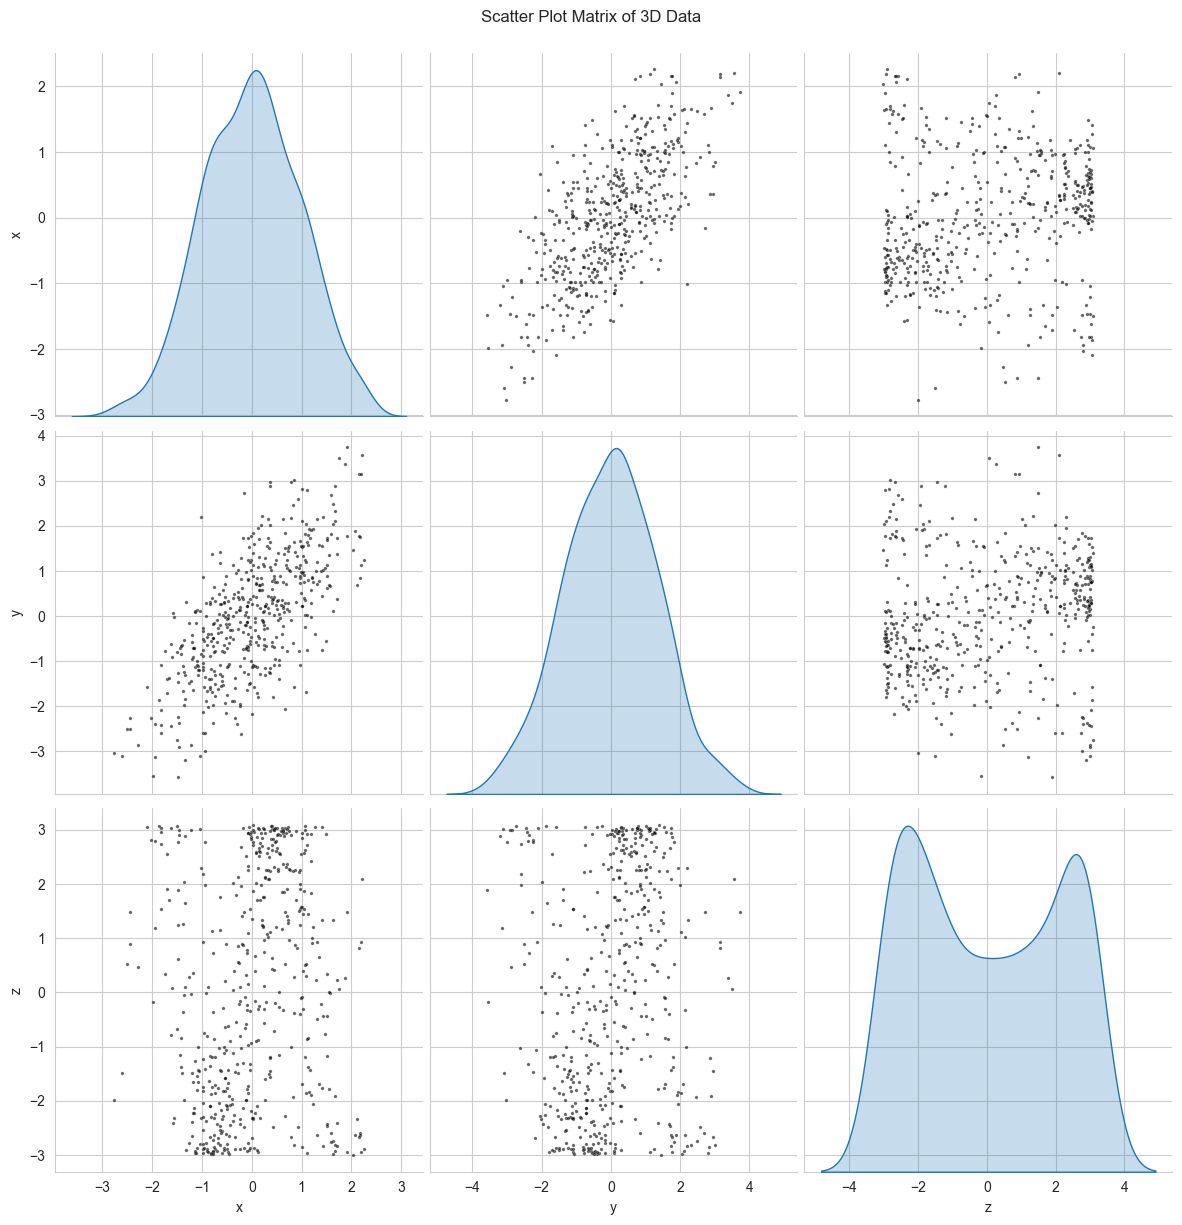

In [ ]:
data_3d = pd.read_csv('./resources/pca-data-3d.txt')

print(df.head())

centered_data = data_3d - data_3d.mean()

centered_df = pd.DataFrame(centered_data, columns=data_3d.columns)



import seaborn as sns

# Create pairplot with seaborn (prettier and more customizable)
sns.set_style('whitegrid')
sns.pairplot(centered_df, height=4, aspect=1, 
             plot_kws={'s': 6, 'alpha': 0.6, 'color': 'black'}, 
             diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of 3D Data', y=1.02)
plt.show()

In [ ]:
cov_matrix = np.cov(centered_data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
idx = eigenvalues.argsort()[::-1]
sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvalues
eigenvectors[:, idx[2]]

array([ 0.51120047,  0.83065188, -0.22066159])

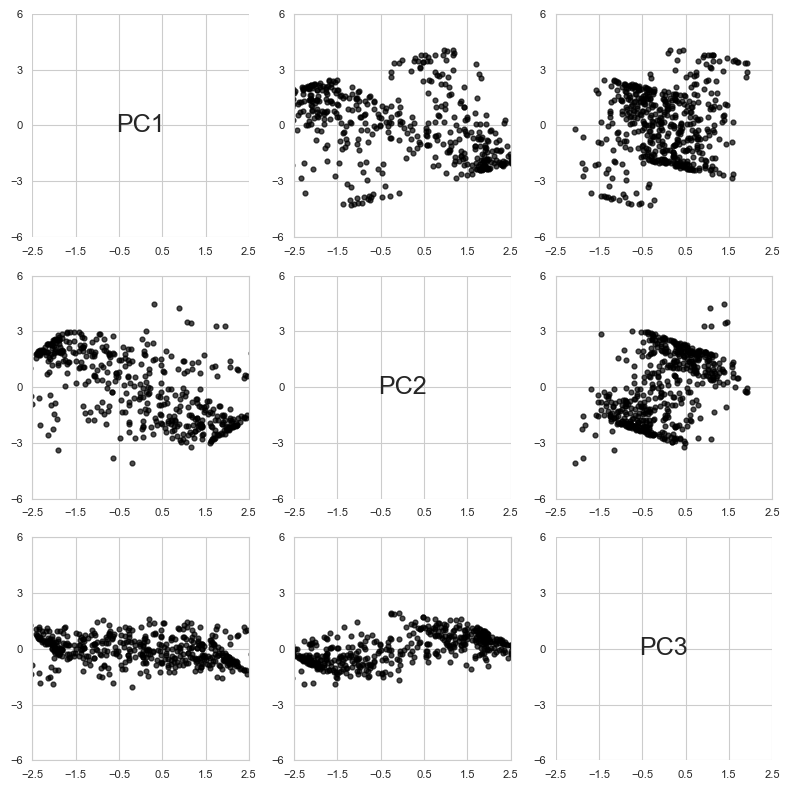

In [153]:
# Create a matrix from the three sorted eigenvectors
pc_matrix = np.column_stack([
    eigenvectors[:, idx[0]],  # First PC (highest variance)
    eigenvectors[:, idx[1]],  # Second PC
    eigenvectors[:, idx[2]]   # Third PC
])

projection = centered_data @ pc_matrix.T
projection_df = pd.DataFrame(projection)
projection_df.columns = ['PC1', 'PC2', 'PC3']

cols = projection_df.columns
n = len(cols)

cols = projection_df.columns
n = len(cols)

# Set your custom limits and ticks
x_min, x_max = -2.5, 2.5
y_min, y_max = -6, 6
x_ticks = np.linspace(x_min, x_max, 6)  # e.g., -2.5, -1.5, ..., 2.5
y_ticks = np.linspace(y_min, y_max, 5)  # e.g., -4, -2, 0, 2, 4

fig, axes = plt.subplots(n, n, figsize=(8, 8))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        if i == j:
            # Diagonal: variable name, centered
            ax.text(0.5, 0.5, cols[i], fontsize=18, ha='center', va='center', transform=ax.transAxes)
            ax.set_frame_on(False)
        else:
            # Off-diagonal: scatter plot
            ax.scatter(projection_df[cols[j]], projection_df[cols[i]], 
                       s=12, color='black', alpha=0.7)
        # Set custom x and y limits and ticks
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)
        ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

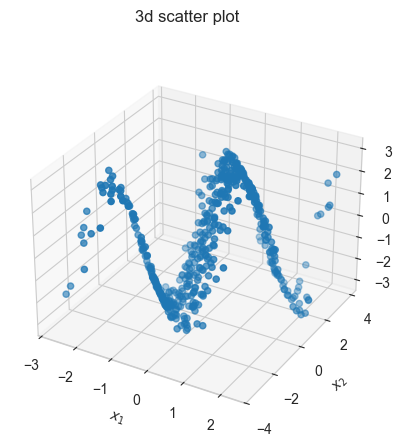

In [168]:
data3d = np.genfromtxt(fname = 'resources/pca-data-3d.txt', delimiter=',', 
                       dtype = float, skip_header=1)

data3d = data3d - np.mean(data3d, axis=0)

fig = plt.figure()
plt.suptitle('3d scatter plot')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centered_data[:, 0], centered_data[:, 1], centered_data[:, 2], zdir='z')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
plt.show()

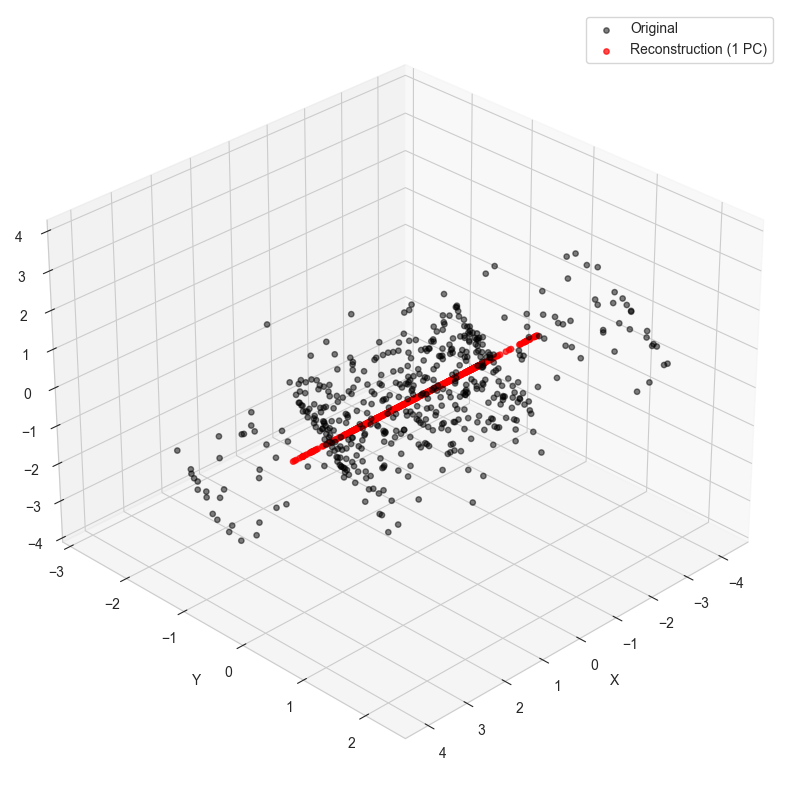

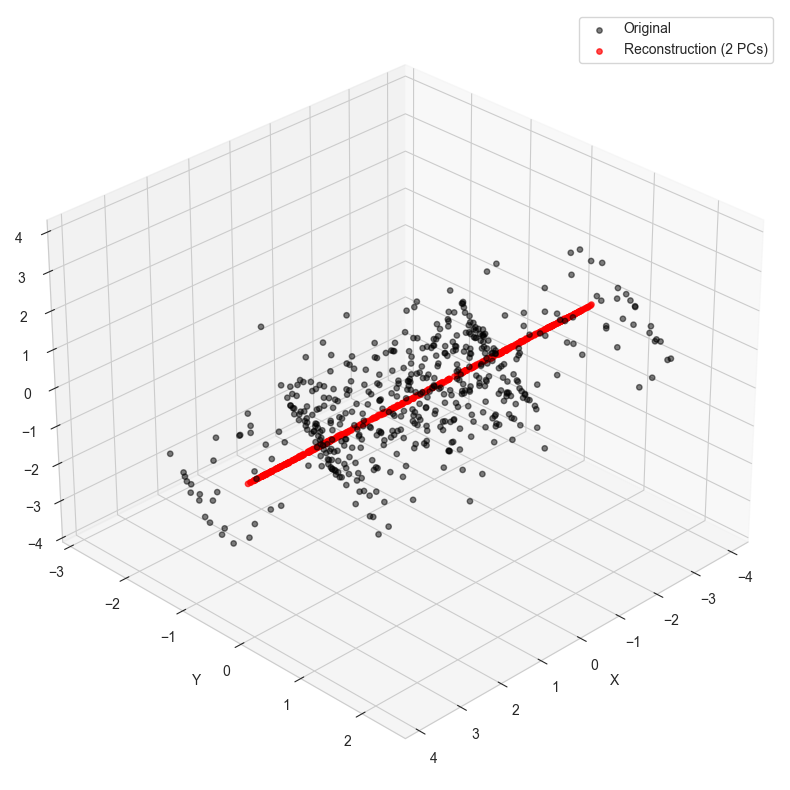

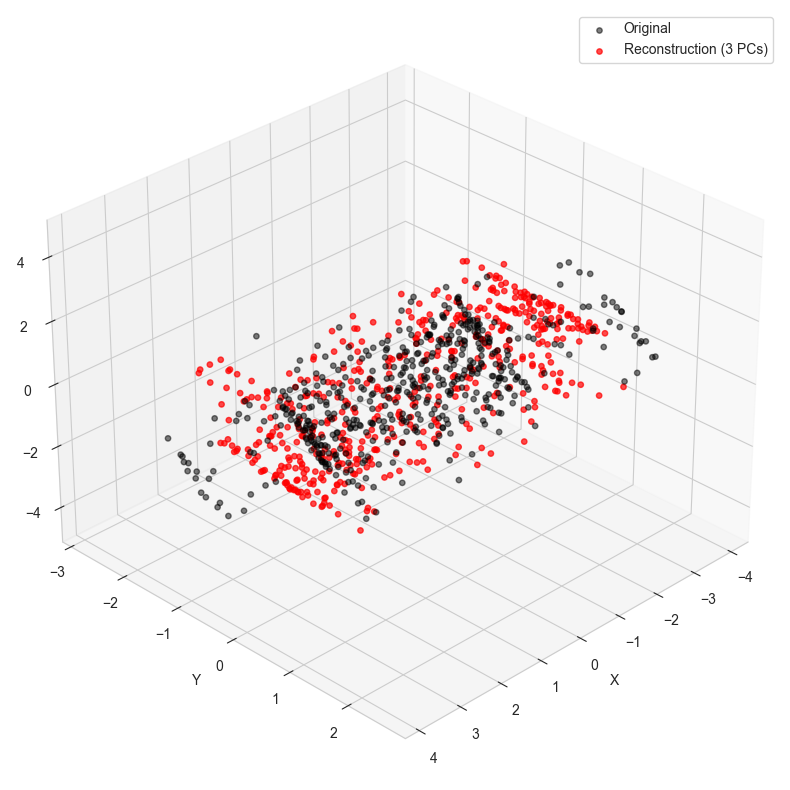

In [159]:
reconstructions = []
for k in [1, 2, 3]:
    # Take only the first k principal components
    proj_k = projection[:, :k]           # (n, k)
    pcs_k = pc_matrix[:, :k]             # (3, k)
    # Reconstruct: project back to original space
    recon_k = proj_k @ pcs_k.T
    reconstructions.append(recon_k)
    
from mpl_toolkits.mplot3d import Axes3D

# Define reconstruction labels
recon_labels = ['1 PC', '2 PCs', '3 PCs']

# Create three separate plots
for k in range(3):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot original centered data
    ax.scatter( centered_data[:, 2],centered_data[:, 0], centered_data[:, 1], 
              s=15, color='black', alpha=0.5, label='Original')
    
    # Plot reconstructed data in red
    ax.scatter(reconstructions[k][:, 2],reconstructions[k][:, 0], reconstructions[k][:, 1], 
              s=15, color='red', alpha=0.7, label=f'Reconstruction ({recon_labels[k]})')
    
    
    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Add legend
    ax.legend()
    
    # Set the same view angle for all plots
    ax.view_init(elev=30, azim=45)
    
    


    plt.tight_layout()
    plt.show()
